In [1]:
%run to_import.py
%matplotlib inline

In [2]:
segm_set=range(1,13)
data_folder='../../Data_Raw'
data_small='../../Data_Small_Tables'

In [12]:
#download data
aa_all=range(13)
for s in segm_set:
    aa_all[s]=pd.read_csv(data_folder+'/S'+str(s)+'_sum_10_size_4_with_nons_aa_avg.csv',sep='\t')

In [ ]:
#download k and s12 parameters
table_s12_k=pd.read_csv(data_small+'/table_s12_k_with_nons.csv',sep='\t',index_col=0)

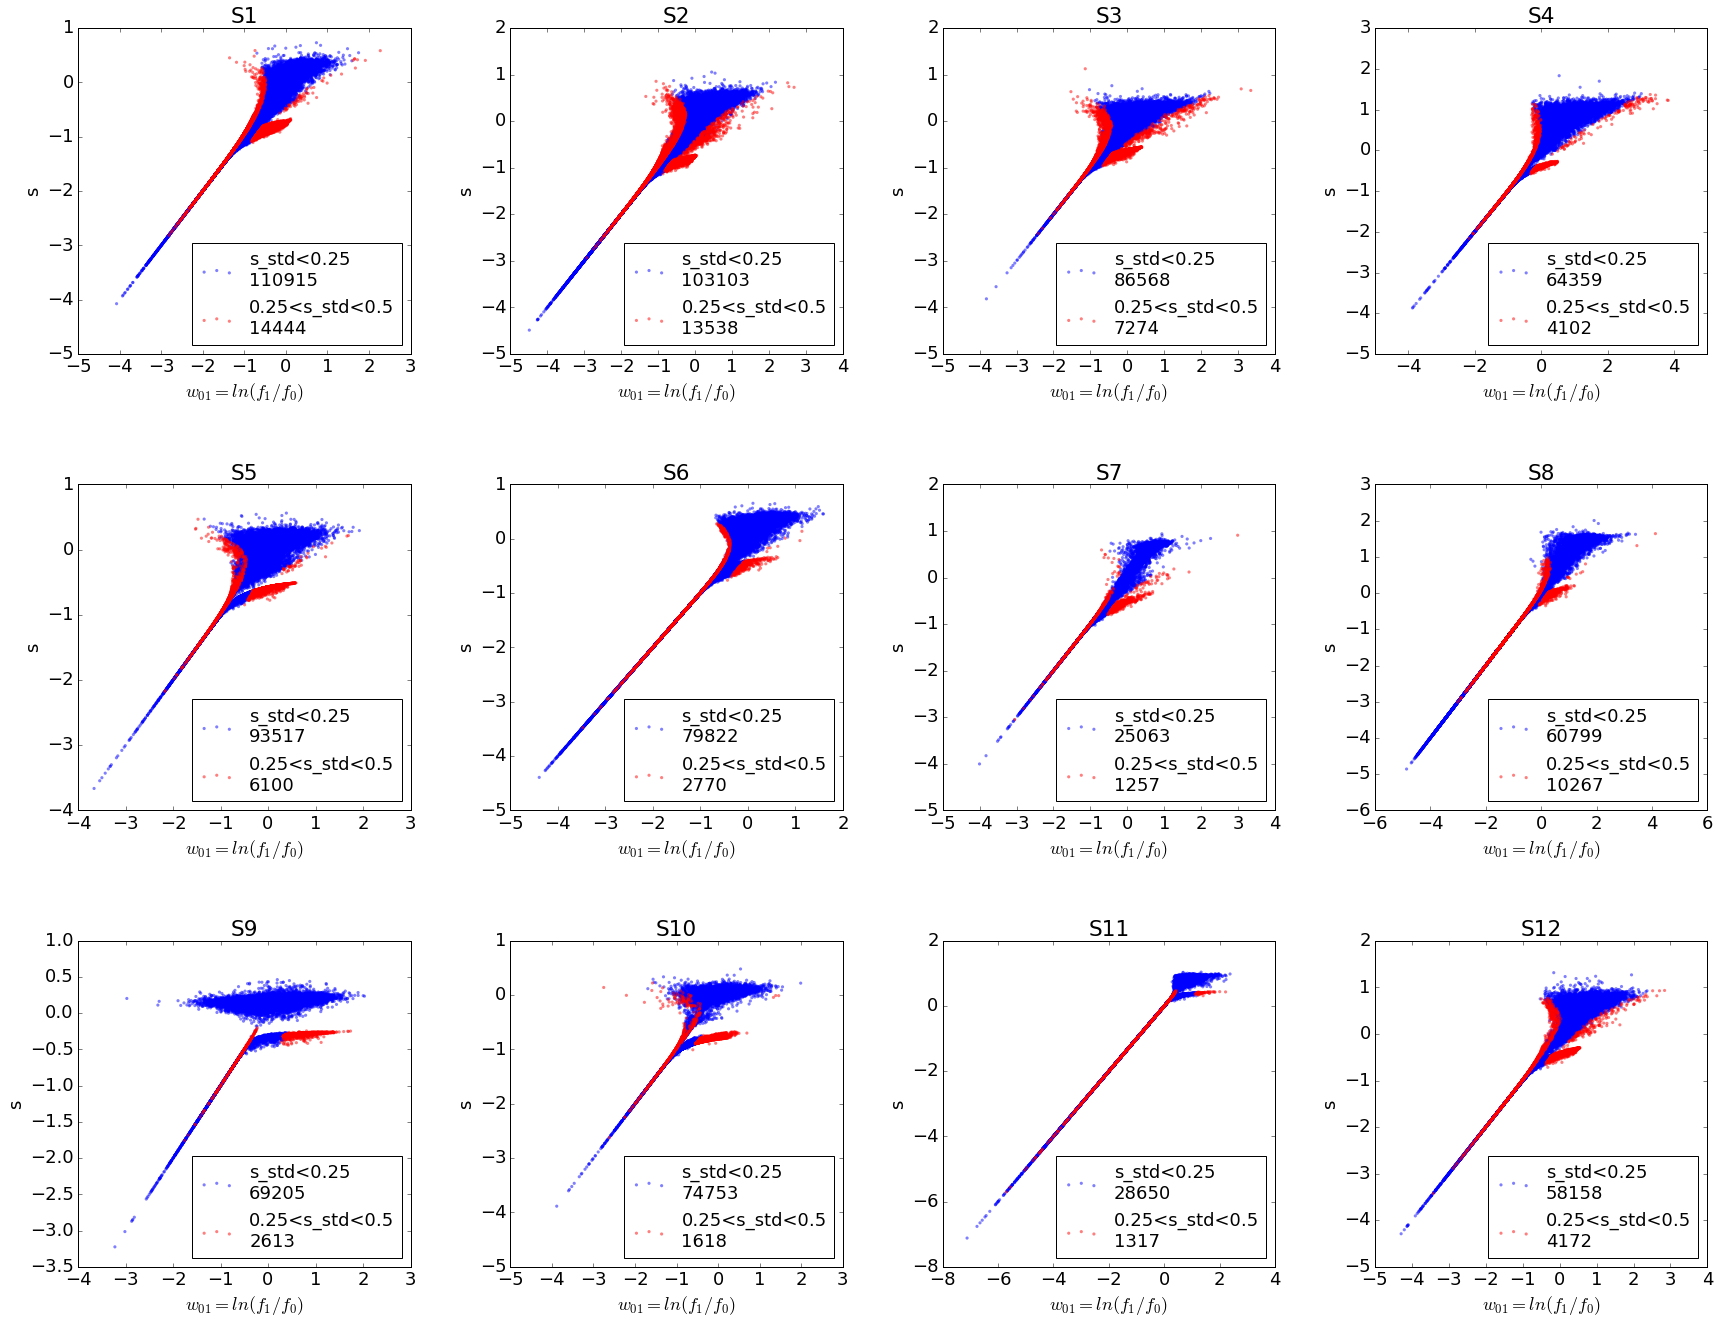

In [17]:
# w01 vs exponentia fitness s 
fig=plt.figure(figsize=(4*7.3,3*7.4))
plt.rcParams.update({'font.size': 18,'legend.fontsize': 18})
#plt.suptitle(name+' size_12>=2', fontsize=36)
plt.subplots_adjust(hspace = 0.4,wspace=0.3)

count=1
for s in segm_set:
    plt.subplot(3,4,count)
    mask1=aa_all[s][aa_all[s]['s_std']<0.25]
    plt.scatter(np.log((mask1['t1_fr'])/(mask1['t0_fr'])),mask1['s'],s=10,edgecolor='',alpha=0.5,c='b',\
                label='s_std<0.25\n%d' %(len(mask1)))
    
    mask1=aa_all[s][(aa_all[s]['s_std']>=0.25)&(aa_all[s]['s_std']<0.5)]
    plt.scatter(np.log((mask1['t1_fr'])/(mask1['t0_fr'])),mask1['s'],s=10,edgecolor='',alpha=0.5,c='r',\
                label='0.25<s_std<0.5\n%d' %(len(mask1)))
    
    plt.title('S'+str(s))
    plt.xlabel(r'$w_{01}=ln(f_{1}/f_{0})$')
    plt.ylabel('s')
    plt.legend(loc=4)
    count+=1

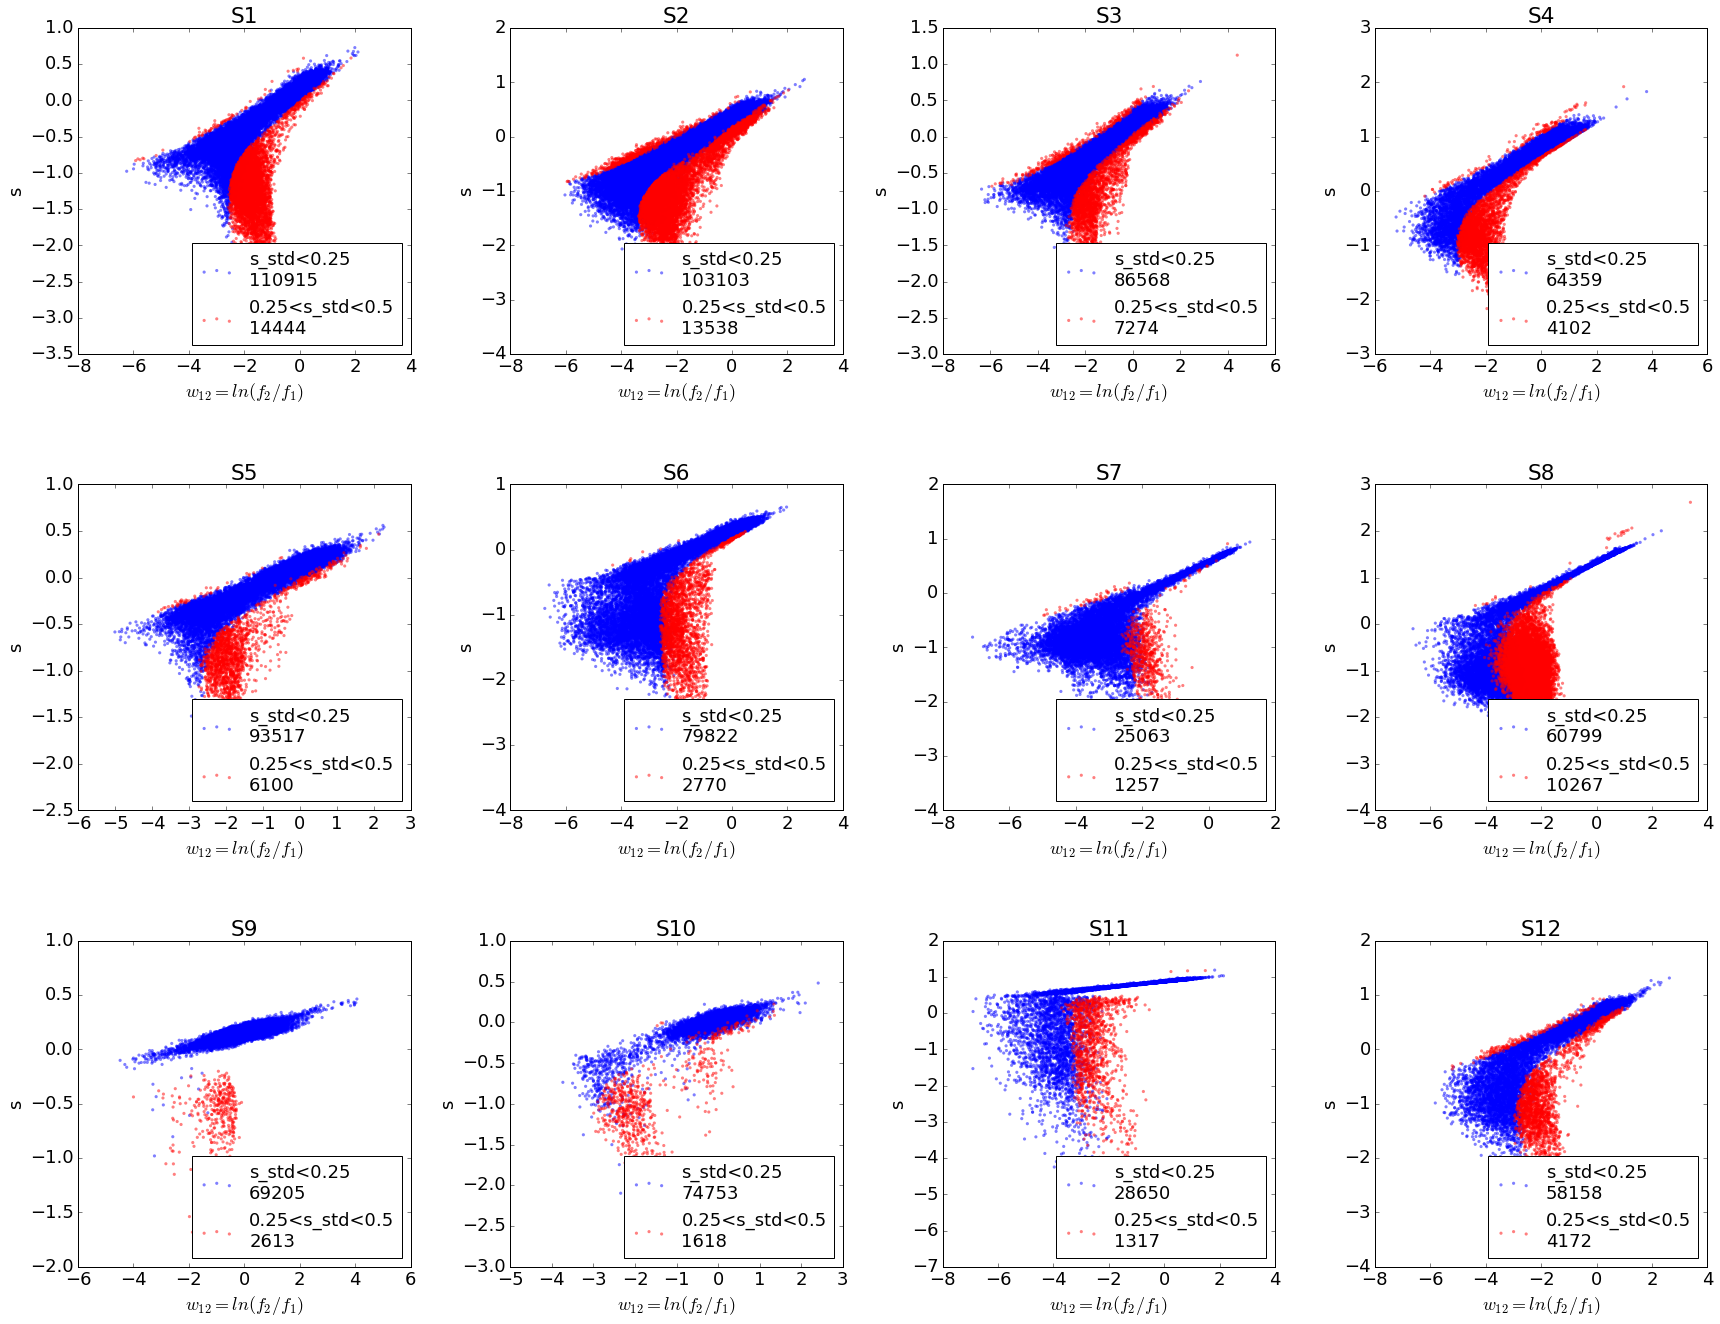

In [18]:
# w12 vs exponentia fitness s 
fig=plt.figure(figsize=(4*7.3,3*7.4))
plt.rcParams.update({'font.size': 18,'legend.fontsize': 18})
#plt.suptitle(name+' size_12>=2', fontsize=36)
plt.subplots_adjust(hspace = 0.4,wspace=0.3)

count=1
for s in segm_set:
    plt.subplot(3,4,count)
    mask1=aa_all[s][aa_all[s]['s_std']<0.25]
    plt.scatter(np.log((mask1['t2_fr'])/(mask1['t1_fr'])),mask1['s'],s=10,edgecolor='',alpha=0.5,c='b',\
                label='s_std<0.25\n%d' %(len(mask1)))
    
    mask1=aa_all[s][(aa_all[s]['s_std']>=0.25)&(aa_all[s]['s_std']<0.5)]
    plt.scatter(np.log((mask1['t2_fr'])/(mask1['t1_fr'])),mask1['s'],s=10,edgecolor='',alpha=0.5,c='r',\
                label='0.25<s_std<0.5\n%d' %(len(mask1)))
    plt.xlabel(r'$w_{12}=ln(f_{2}/f_{1})$')
    plt.ylabel('s')
    plt.legend(loc=4)
    plt.title('S'+str(s))
    count+=1

In [11]:
table_s12_k=pd.read_csv(data_folder+'/table_s12_k.csv',sep='\t',index_col=0)

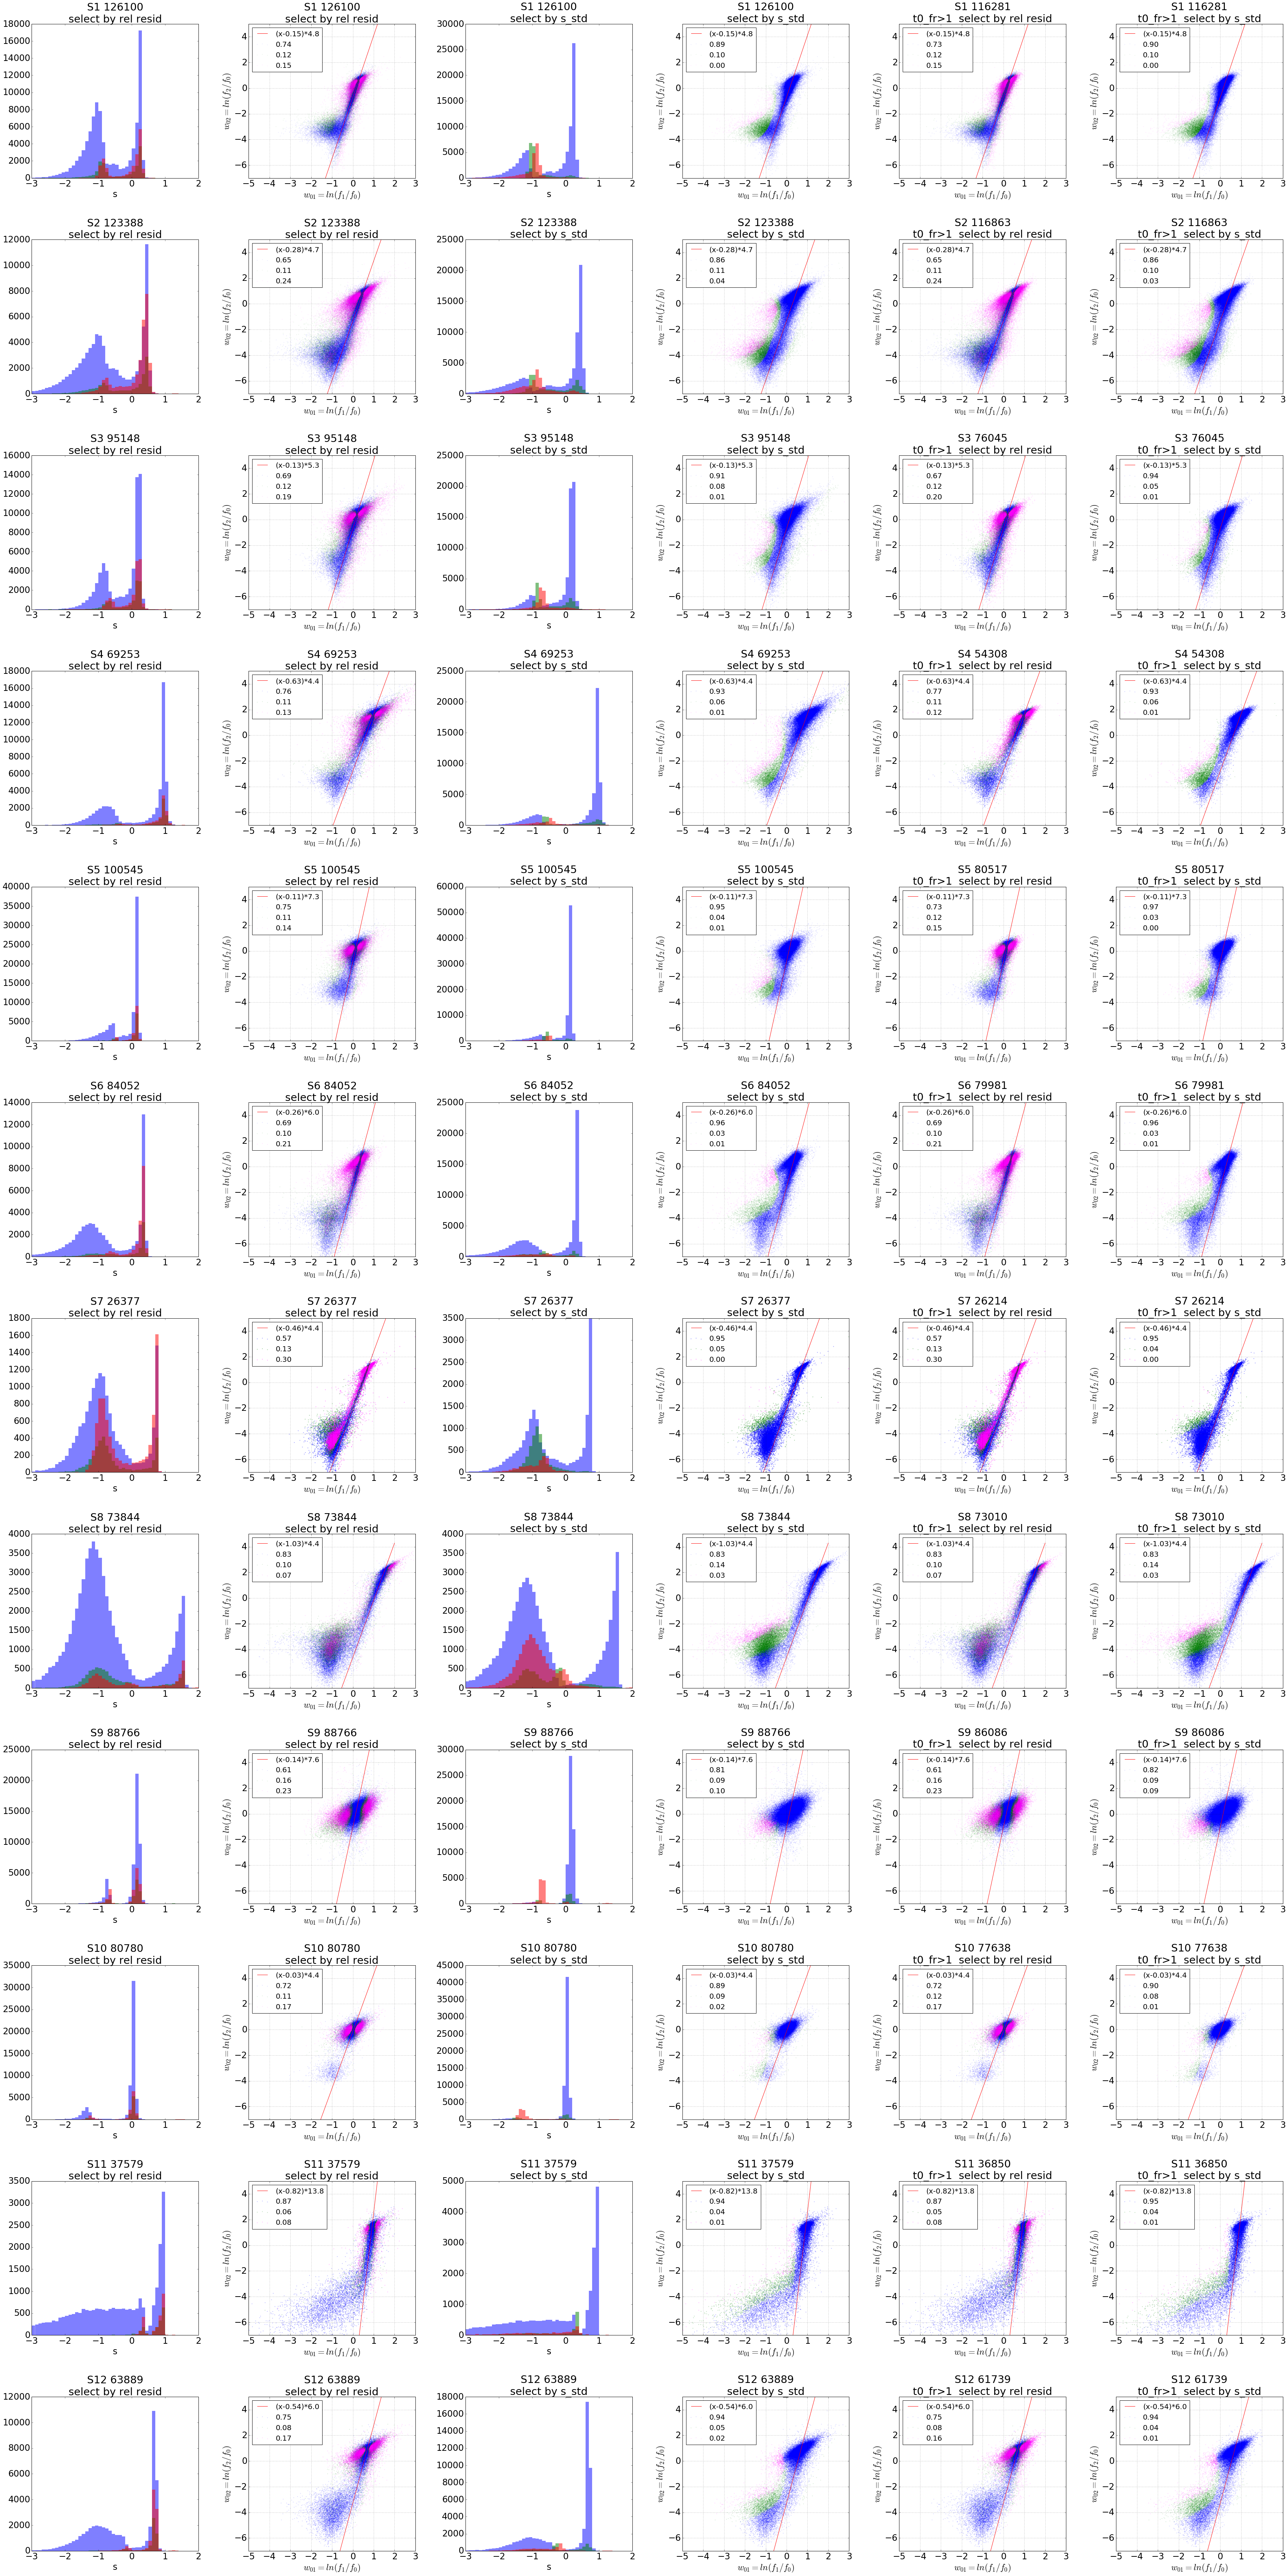

In [13]:
def plot_3(mask1,mask2,mask3,s12,k,alpha):
    plt.plot(range(-3,3),map(lambda x:(x-s12)*k,range(-3,3)),c='r')
    plt.scatter(np.log((mask1['t1_fr'])/(mask1['t0_fr'])),np.log((mask1['t2_fr'])/(mask1['t0_fr']))\
    ,s=5,edgecolor='',alpha=alpha,c='b')
    plt.scatter(np.log((mask2['t1_fr'])/(mask2['t0_fr'])),np.log((mask2['t2_fr'])/(mask2['t0_fr']))\
    ,s=5,edgecolor='',alpha=alpha,c='g')
    plt.scatter(np.log((mask3['t1_fr'])/(mask3['t0_fr'])),np.log((mask3['t2_fr'])/(mask3['t0_fr']))\
    ,s=5,edgecolor='',alpha=alpha,c='magenta')
    tmp_len_total=len(mask1)+len(mask2)+len(mask3)
    plt.legend(["(x-%.2f)*%.1f" %(s12,k),\
                "%.2f" %(len(mask1)*1./tmp_len_total),"%.2f" %(len(mask2)*1./tmp_len_total),"%.2f" %(len(mask3)*1./tmp_len_total)],loc=2)
    plt.xlim(-5,3)
    plt.ylim(-7,5)
    plt.grid()
    plt.xlabel(r'$w_{01}=ln(f_{1}/f_{0})$')
    plt.ylabel(r'$w_{02}=ln(f_{2}/f_{0})$')
    
n_segm=12

fig=plt.figure(figsize=(6*10.3,n_segm*10.4))
plt.rcParams.update({'font.size': 24,'legend.fontsize': 20})
#plt.suptitle(name+' size_12>=2', fontsize=36)
plt.subplots_adjust(hspace = 0.4,wspace=0.3)

count=1
mask_size=1000000
fr_thr=1
for s in segm_set[:n_segm]:
    length_all=len(aa_all[s])
    mask=aa_all[s].sample(min(mask_size,length_all))
    alpha=min(10.**4/len(mask),1)
    s12,k=table_s12_k.loc['S'+str(s)][['s12','k']]

    plt.subplot(n_segm,6,count)
    plt.title('S'+str(s)+' '+str(length_all)+'\nselect by rel resid')
    mask1=mask[mask['residuals']<0.75]
    mask2=mask[(mask['residuals']>=0.75)&(mask['residuals']<1)]
    mask3=mask[mask['residuals']>=1]
    plt.hist(mask1['s'],bins=50,range=(-3,2),alpha=0.5,edgecolor='none')
    plt.hist(mask2['s'],bins=50,range=(-3,2),alpha=0.5,edgecolor='none')
    plt.hist(mask3['s'],bins=50,range=(-3,2),alpha=0.5,edgecolor='none')
    plt.xlabel("s")
    count+=1
    
    plt.subplot(n_segm,6,count)
    plt.title('S'+str(s)+' '+str(length_all)+'\nselect by rel resid')
    mask1=mask[mask['residuals']<0.75]
    mask2=mask[(mask['residuals']>=0.75)&(mask['residuals']<1)]
    mask3=mask[mask['residuals']>=1]
    plot_3(mask1,mask2,mask3,s12,k,alpha)
    count+=1
    
    plt.subplot(n_segm,6,count)
    plt.title('S'+str(s)+' '+str(length_all)+'\nselect by s_std')
    mask1=mask[mask['s_std']<0.1]
    mask2=mask[(mask['s_std']>=0.1)&(mask['s_std']<0.2)]
    mask3=mask[mask['s_std']>=0.2]
    plt.hist(mask1['s'],bins=50,range=(-3,2),alpha=0.5,edgecolor='none')
    plt.hist(mask2['s'],bins=50,range=(-3,2),alpha=0.5,edgecolor='none')
    plt.hist(mask3['s'],bins=50,range=(-3,2),alpha=0.5,edgecolor='none')
    plt.xlabel("s")
    count+=1
    
    plt.subplot(n_segm,6,count)
    plt.title('S'+str(s)+' '+str(length_all)+'\nselect by s_std')
    mask1=mask[mask['s_std']<0.25]
    mask2=mask[(mask['s_std']>=0.25)&(mask['s_std']<0.5)]
    mask3=mask[mask['s_std']>=0.5]
    plot_3(mask1,mask2,mask3,s12,k,alpha)
    count+=1   

    
    length_all=len(aa_all[s][aa_all[s]['t0_fr']>fr_thr])
    mask=aa_all[s][aa_all[s]['t0_fr']>fr_thr].sample(min(mask_size,length_all))
    alpha=min(10.**4/len(mask),1)
    
    plt.subplot(n_segm,6,count)
    plt.title('S'+str(s)+' '+str(length_all)+'\nt0_fr>'+str(fr_thr)+'  select by rel resid')
    mask1=mask[mask['residuals']<0.75]
    mask2=mask[(mask['residuals']>=0.75)&(mask['residuals']<1)]
    mask3=mask[mask['residuals']>=1]
    plot_3(mask1,mask2,mask3,s12,k,alpha)
    count+=1
    
    plt.subplot(n_segm,6,count)
    plt.title('S'+str(s)+' '+str(length_all)+'\nt0_fr>'+str(fr_thr)+'  select by s_std')
    mask1=mask[mask['s_std']<0.25] 
    mask2=mask[(mask['s_std']>=0.25)&(mask['s_std']<0.5)]
    mask3=mask[mask['s_std']>=0.5]
    plot_3(mask1,mask2,mask3,s12,k,alpha)
    count+=1
#fig.savefig('data_all_segments/12_12/fig_variance_adjustedbins_5000perbin/exponent_fit_alldots_bybest10000.png')

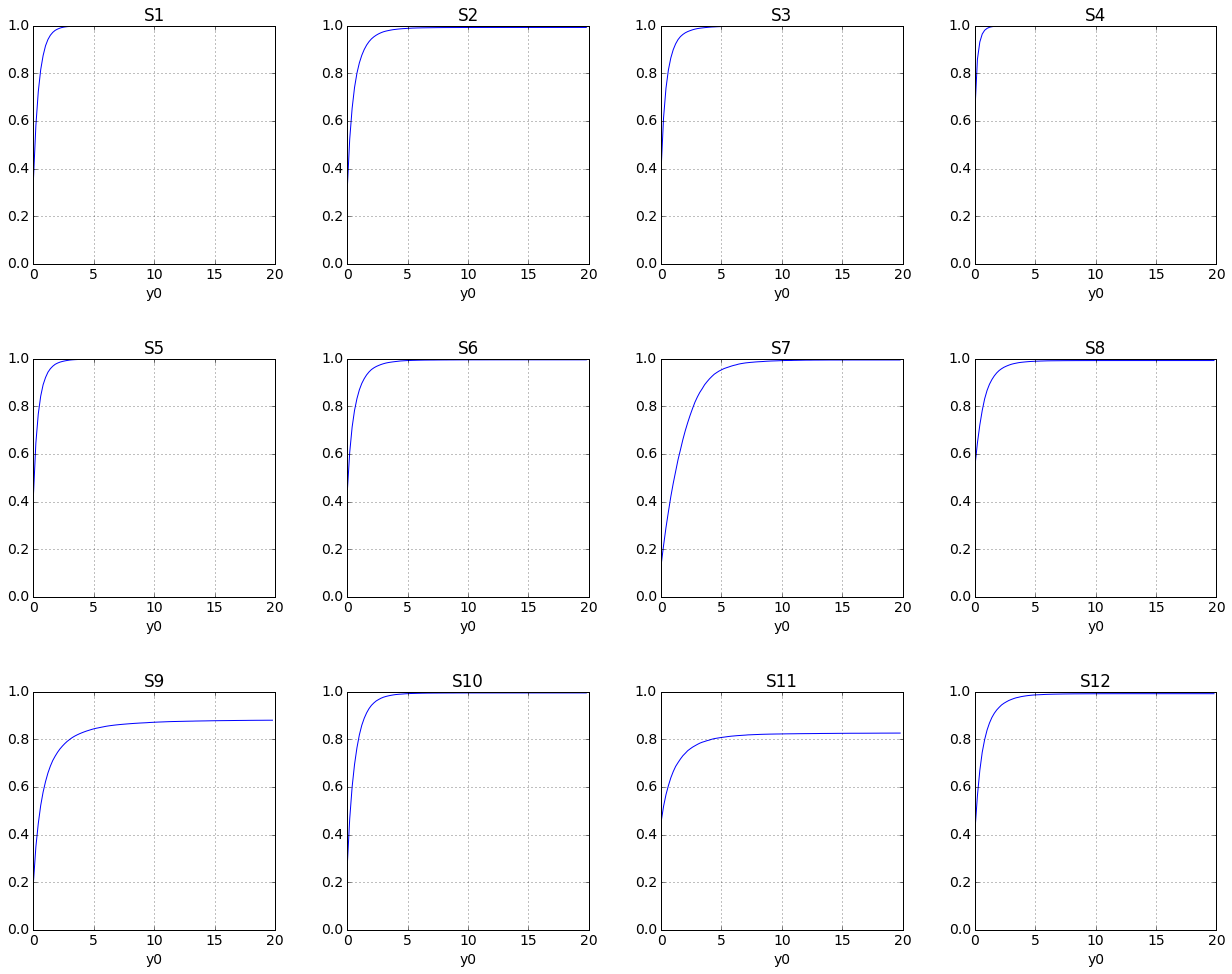

In [34]:
fig=plt.figure(figsize=(4*5.3,3*5.4))
plt.rcParams.update({'font.size': 14,'legend.fontsize': 14})
#plt.suptitle(name+' size_12>=2', fontsize=36)
plt.subplots_adjust(hspace = 0.4,wspace=0.3)

count=1
for s in segm_set:
    plt.subplot(3,4,count)
    mask=aa_all[s][(aa_all[s]['aa_seq'].map(lambda x: x.count('_'))==0)]
    #plt.title("%d %d" %(len([item for item in mask['residuals'].values if str(residuals)=='nan']),\
    #len([item for item in mask['s'].values if str(residuals)=='nan'])))
    values, base = np.histogram(mask['y0_std'],range=(0,20), bins=100)
    cumulative = np.cumsum(values)
    plt.plot(base[:-1], cumulative*1./len(mask), c='blue')
    plt.title('S'+str(s))
    plt.xlabel('y0')
    plt.grid()
    plt.ylim(0,1)
    count+=1